In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Right TEMPORAL of subjects in UKB, HCP, CCD and CCD Controls after implementing a betaVAE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load files

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/hcp/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/CCD/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/hcp/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/CCD/Reconstruction_error.csv")

In [3]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [4]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [5]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [6]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [7]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,ag080048,3.110416,-0.336188,1.934122,0.953694,-1.253165,-0.060003,0.902652,-0.121189,0.904996,...,1.881853,0.675222,0.997781,0.317653,0.394346,0.497732,1.363911,-0.514950,-1.782933,-1.732004
1,bt080019,0.331219,0.572843,-1.536742,-1.232655,-1.222752,0.097905,-0.757499,0.034566,0.516669,...,0.893202,1.120202,-0.369098,0.587045,-1.396857,-1.559000,-0.430846,-0.320030,0.105743,-0.605336
2,ca090293,-0.469929,1.138995,-0.005817,0.764363,-1.889622,0.143270,1.061481,1.074025,1.060822,...,1.835685,1.463822,-1.003914,0.274533,-2.445064,-1.141260,0.784500,0.530444,-0.874900,-0.630891
3,cd100556,-1.411445,-1.162466,-0.052805,-0.245002,-0.575452,-0.502136,-0.902192,-0.106055,0.234098,...,1.095410,-0.484549,0.172181,-0.207743,0.858897,0.470655,0.303694,-1.603675,-1.454161,-1.224829
4,cr070055,1.594629,-0.015514,0.926933,-0.916110,0.454137,-2.463146,-0.858231,1.290557,0.620202,...,-0.851916,-2.735916,0.858462,1.684040,0.887022,0.795276,2.128021,1.044714,-1.438715,-0.554153
5,fb070174,-0.937635,-0.757484,2.187024,-1.614207,0.066162,0.335720,0.713131,-1.107227,0.555711,...,0.361825,-0.202792,0.810487,0.145985,-0.011907,-1.236999,-1.080316,-0.080383,0.360997,-0.921812
6,gd070065,1.381285,0.338810,0.306174,-1.054107,-0.940011,1.850495,-0.168556,1.567604,0.451890,...,0.370458,0.061568,0.662570,2.678269,0.339965,-0.045254,0.488900,-0.335537,-0.440023,0.288467
7,lc110410,-2.523299,-0.034205,-0.264521,-0.589256,1.384727,-0.453076,0.783648,-0.678210,-0.309134,...,0.751329,0.210827,1.030158,1.419819,-0.998345,-0.472988,0.514456,-0.589516,-0.924752,-0.188026
8,md110095,0.394670,0.640234,-0.058937,-0.860433,-1.513443,0.714986,0.340810,0.978041,0.410608,...,3.348882,0.144351,-0.333613,-0.093366,-1.057801,-1.238624,0.471840,1.107006,1.219434,-1.526477
9,mm080047,0.860963,-1.031285,0.520309,1.702396,1.069943,0.576093,0.008533,0.246025,-0.872885,...,1.639418,0.472425,1.920429,0.013190,0.287863,0.652083,-1.003788,0.685514,-1.734573,-1.249286


In [8]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,5339.385742
1,bt080019,7479.108887
2,ca090293,7526.133789
3,cd100556,6239.390625
4,cr070055,5279.046875
5,fb070174,6052.086914
6,gd070065,6282.978516
7,lc110410,5538.153809
8,md110095,7423.306641
9,mm080047,4866.791016


In [9]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [10]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [11]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

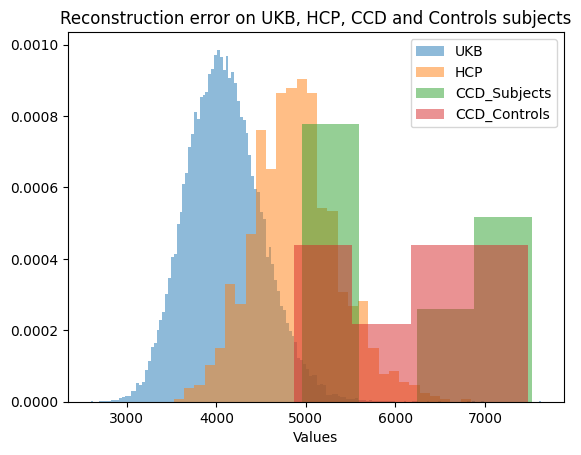

In [12]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [13]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_CCD_Controls.iloc[:,1:76]
X4= Embeddings_CCD_Subjects.iloc[:,1:76]


In [14]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)



/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


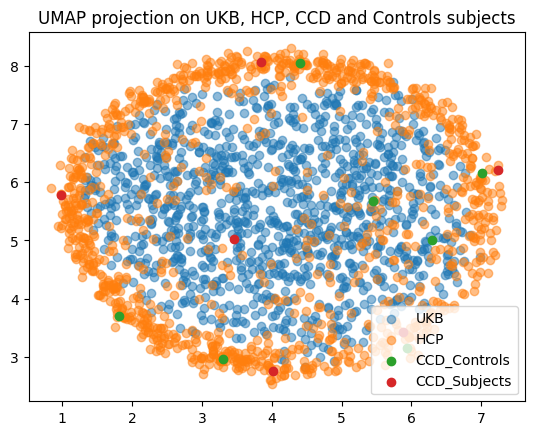

In [15]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="CCD_Subjects")
plt.title("UMAP projection on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [16]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [17]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,4166.667969
1,UKB,3666.123535
2,UKB,4648.703125
3,UKB,4018.779785
4,UKB,4374.946289
...,...,...
42428,UKB,4599.091797
42429,UKB,4594.920898
42430,UKB,3442.721680
42431,UKB,3956.100342


In [18]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:3.382e-05 U_stat=7.720e+02
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:9.452e-01 U_stat=2.200e+01
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:4.496e-04 U_stat=8.140e+02


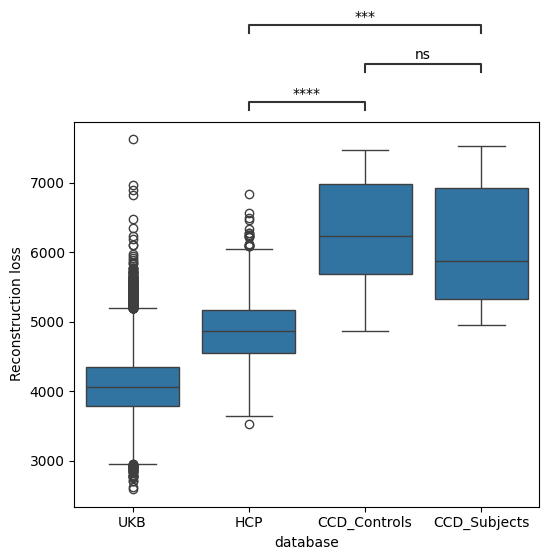

In [19]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()
